# 1. Frame the problem
# WRITE MORE HERE SOMEHOW
Given a picture of a random English cursive letter, determine which letter the picture depicts. (Ex. A short loop generally depicts an e, while a tall loop depicts an l.)

# 2. Get the Data 
# I need to see if I'm gonna need to like put the stuff in a df somehow so yea idk this is still very wip i just did all the basic data prep (the fact that all the stuff i alr wrote is just "basic" is terrifying)
- The data was initially provided in a google drive zip folder called "2023 Cursive".
- To initially load the data, I downloaded the zip file onto my local machine, and then utilized the Jupyter upload feature to upload the zip file to the remote server.
- After the zip file was fully uploaded, I unzipped the file using the unzip package, renaming the outputted folder to 2023_Cursive for simplicity. Inside the new folder there were 9 zip files, each labelled 1 to 9."
- I unzipped each folder individually using the unzip package. Each time I would unzip a folder, its name would change to what the student originally called it, so I would rename the newly created folder back to the number of its corresponding zip file. This was to keep the files/folders organized, also preventing files from mixing since some of the original folder names are identical. (Ex. Unzipping "1.zip" outputs a folder called "Cursive letters", so I renamed that folder to just "1".)
- Finally, after unzipping everything, I deleted all the zip files by running "rm *.zip -r" in the "2023_Cursive" folder, leaving only the newly unzipped folders.

# 3. Explore the Data
#### Below is a data explorer that just allows you to look at any image you want by simply typing a 2 character string: the number of the folder, and the letter. Alternatively, typing "s" in place of the folder will show you all instances of your chosen letter.
- (Ex. "1a" will show you the picture for the letter "a" in folder 1. "sa" will show you all pictures of the letter "a" across all 9 folders.)

Folder and Letter: a


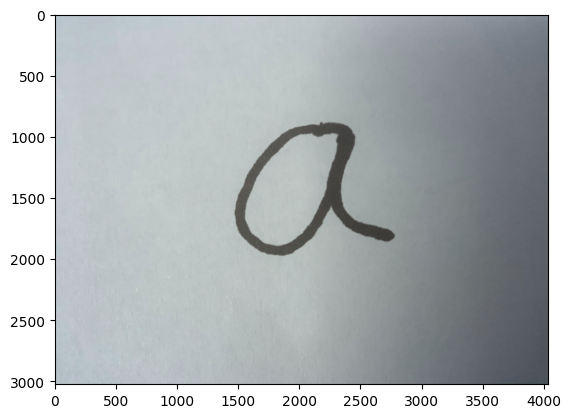

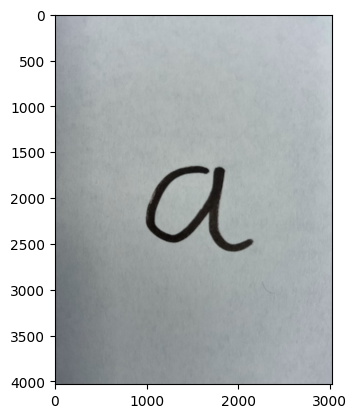

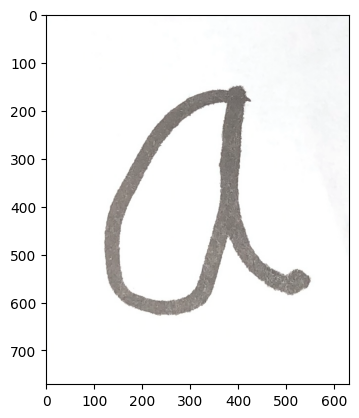

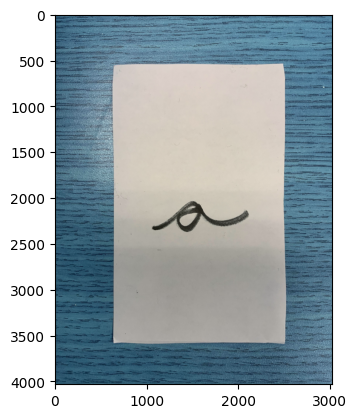

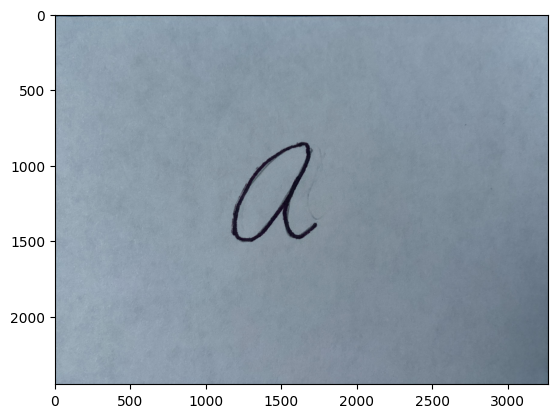

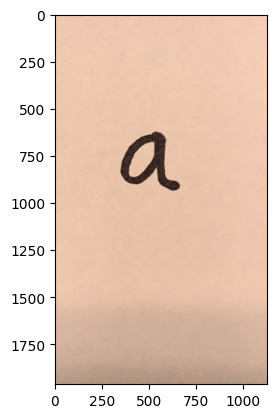

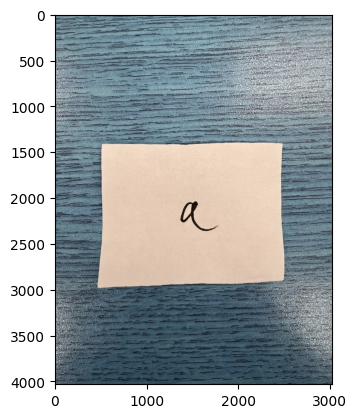

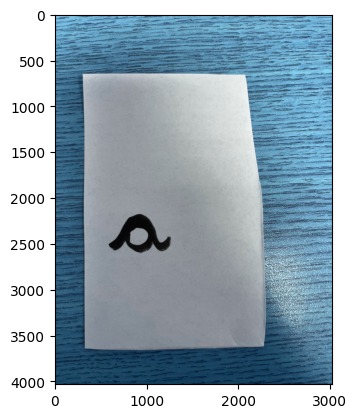

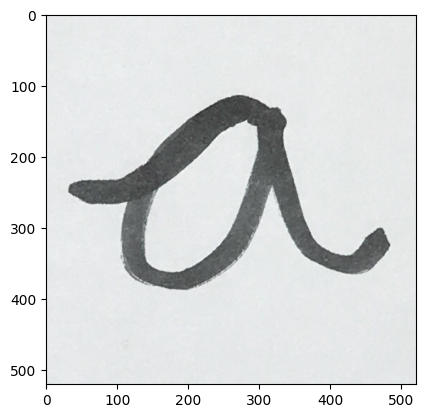

KeyboardInterrupt: Interrupted by user

In [80]:
import cv2
from matplotlib import pyplot as plt
from IPython.display import clear_output #so that output is cleared after every page to prevent clutter and huge outputs

#search thing to see any image without having to look for it in files
while True:
    uinput = input("Folder and Letter: ") #ex. "2a" to see folder 2, letter a. SPECIAL FEATURE: to see all images of a certain letter, do "s" + the letter you want to view, and it will show all letters.
    clear_output()
    print("Folder and Letter: " + uinput)
    if len(uinput) == 1:
        try:
            for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
                image = cv2.imread("2023_Cursive/" + str(int(uinput)) + "/" + letter + ".JPG")
                plt.imshow(image)
                plt.show()
        except:
            for i in range (1,10):
                image = cv2.imread("2023_Cursive/" + str(i) + "/" + uinput[0].upper() + ".JPG")
                plt.imshow(image)
                plt.show()
    else:
        image = cv2.imread("2023_Cursive/" + uinput[0] + "/" + uinput[1].upper() + ".JPG")
        plt.imshow(image)
    plt.show()

# 4. Prepare the Data
#### Some data prep was done during the unzipping process in step 2 to ensure the files and folders all remained organized and consistent enough to be exploreable (see step 2 for details).
#### The files themselves were still messy though, so some data prep had to be done between steps 2 and 3 in preparation for data exploration.
#### Since this data prep wasn't addressed between the 2 steps, all the issues fixed between steps 2 and 3 are listed below (in the same order they were resolved) and their solutions are provided:
- Folders 2 and 6 had several images with no file extensions.
    - To fix this, I created a short program (located in the same folder as this IPYNB) called rename.py. I moved this program into the folders with this issue, and upon running it, it would add ".HEIC" to the end of each file name in the folder (I also made sure to check beforehand that all files with this issue were HEIC images, so there was no need to distinguish between different file types, making the program very simple yet effective).
- Folder 8 had three versions of every image, two versions being unnamed.
    - To fix this, I just ran the command "rm IMG* -r" in the problematic directory which removed all files beginning with "IMG". This left only the files that were properly named.
- Only folders 3, 7, and 9 contained their images in a JPG format. The rest of the folders all contained HEIC images, which are unsupported by OpenCV and most other image processing libraries.
    - To fix this, I created a program (located in the same folder as this IPYNB) called convert.py. Upon being run, this program loops through every single image in the provided dataset. If an image is HEIC, it is converted into JPG. Also, for the sake of consistency, all file names are converted to uppercase so that all file names are the exact same for each set of cursive letters.
###### _At this point, I might as well just do step 4 before step 3 every time since data prep always happens there..._
#### Finally, we return to where we are now, step 4.
- Now arises a much more difficult issue to deal with: standardizing the images themselves.
- I plan to binarize, crop, and scale the images to be the same resolution, aspect ratio, and have each letter in just about the same area. I'm also considering stretching the letters to keep the height and width of the letters consistent but idk yet
- My first step is to binarize the images, basically just rounding each pixel to be either black or white.

- idk how many steps later but make sure to keep a consistent resolution once cropped (so basically isolate the letter, then crop to a certain aspect ratio possibly adding whitespace as needed and then downscale it to a certain resolution)




#### Note for the deployment function: when the deployment function is made, the inputted data will have to be cleaned. I will have to run the inputted image through all the same procedures that the training data went through, so I will have to redo all this data cleaning in the deployment function.

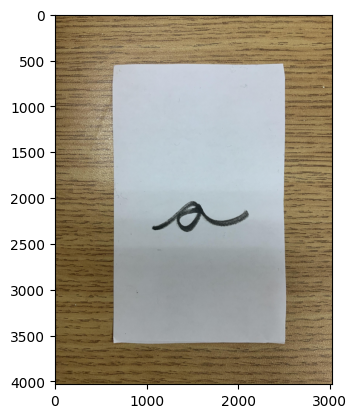

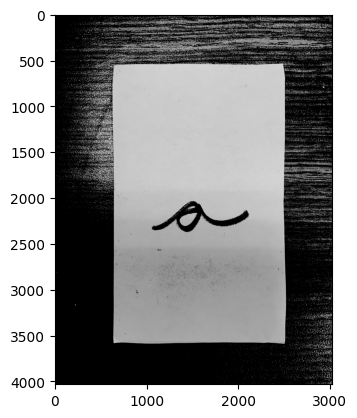

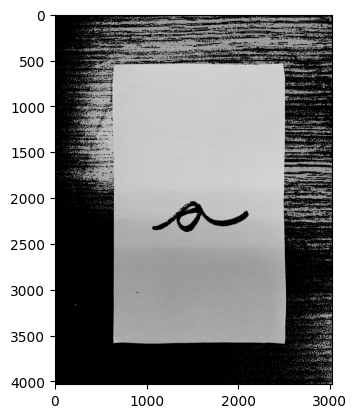

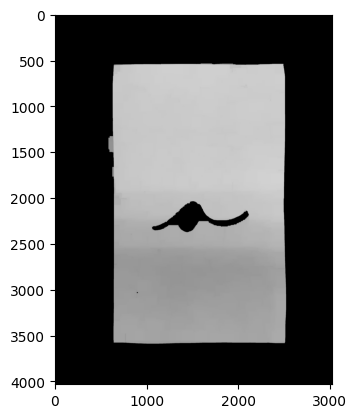

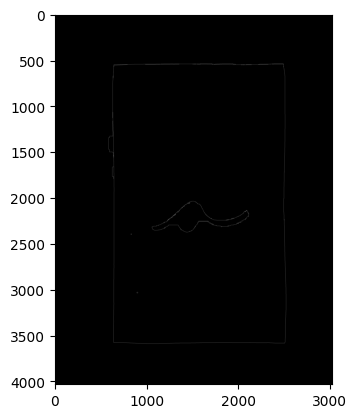

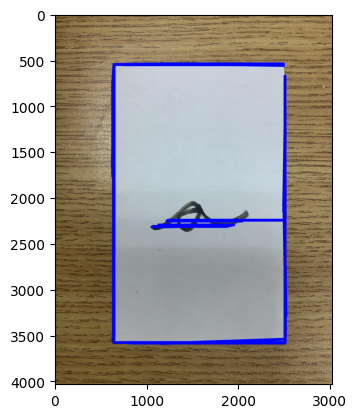

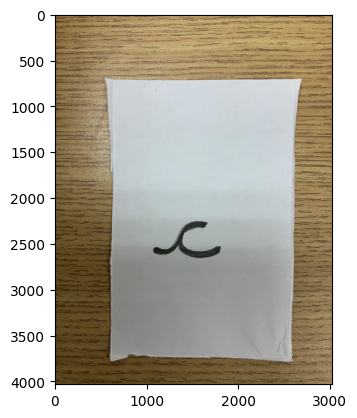

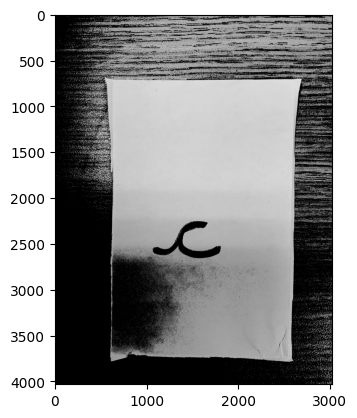

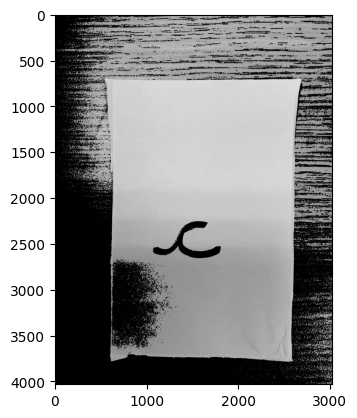

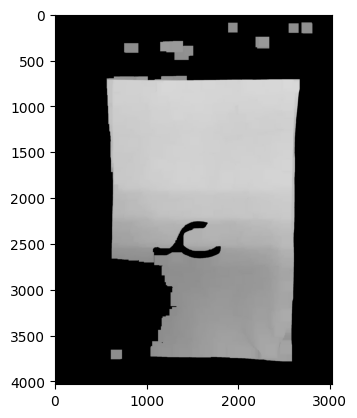

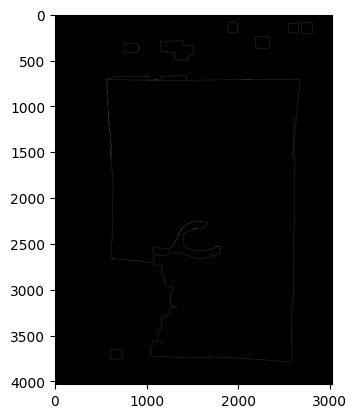

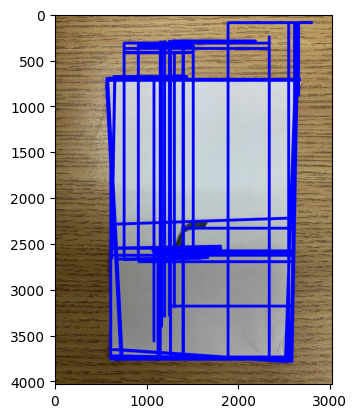

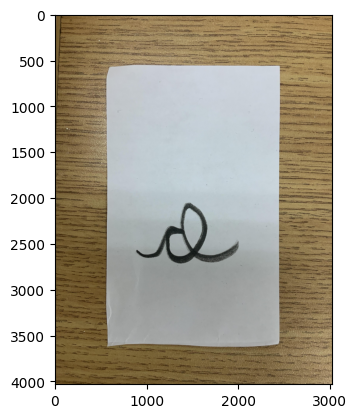

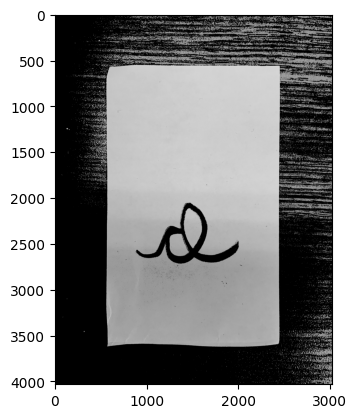

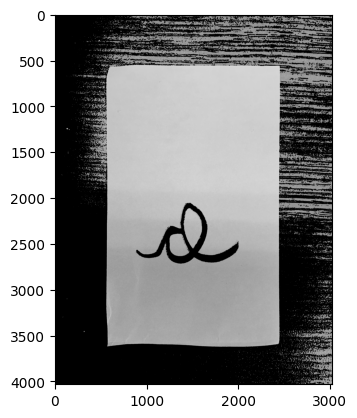

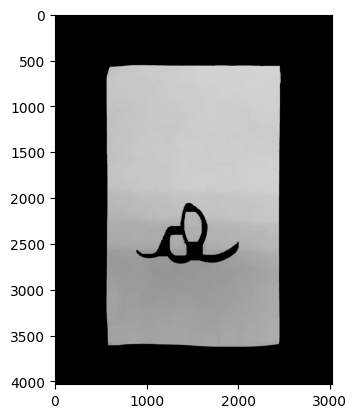

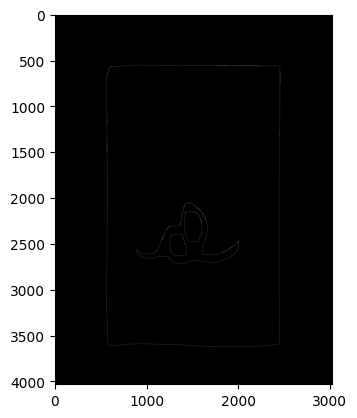

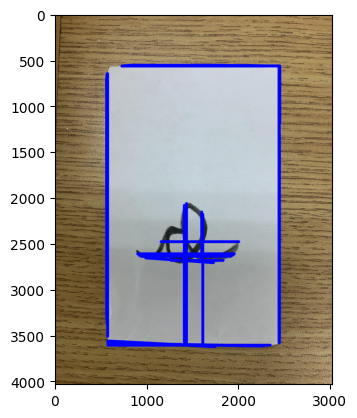

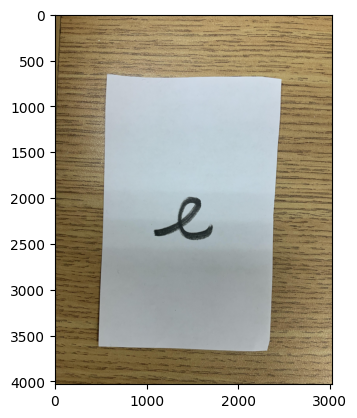

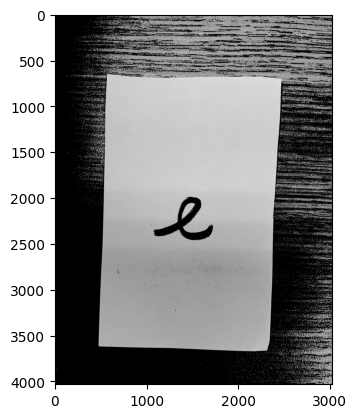

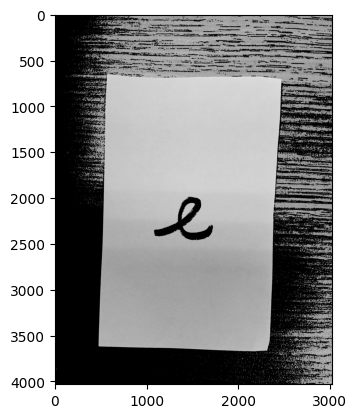

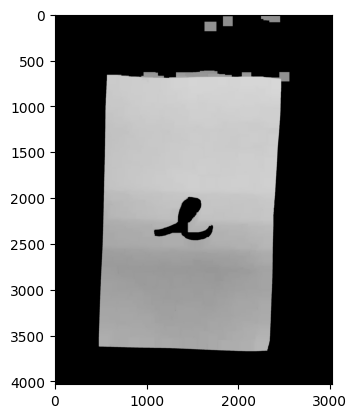

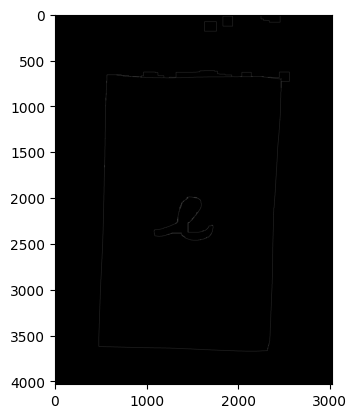

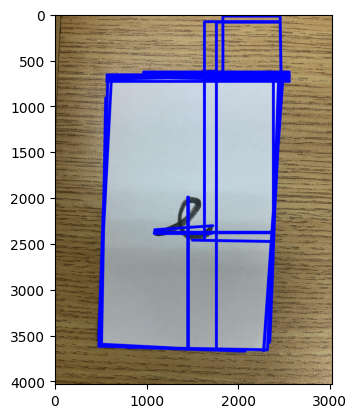

In [81]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def show(img_obj): #made this since pyplot only shows the correct color if u convert to rgb but everything in opencv is done in bgr so yea
    plt.imshow(cv2.cvtColor(img_obj, cv2.COLOR_BGR2RGB))
    plt.show()

#cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# image = cv2.imread("2023_Cursive/1/A.JPG")
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
for letter in "ACDE": #"ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    image = cv2.imread("2023_Cursive/4/" + letter + ".JPG") #bgr to rgb is req for correct colors to show
    show(image)
    
    height = image.shape[0]
    width = image.shape[1]
    
    gimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #make img gray
    
    # bimage = cv2.blur(gimage, (100, 100))
    # show(bimage)
    
    thresh = 140
    #since im gonna stop working on this now, i just wanna say that grayscale binarizing works well, but can have issues
    #what im seeing after shortly 
    binimage = cv2.threshold(gimage, thresh, 255, cv2.THRESH_TOZERO)[1] #cv2.THRESH_BINARY #cv2.THRESH_BINARY_INV #cv2.THRESH_TOZERO #cv2.THRESH_TOZERO_INV
    show(binimage)
    
    kernel1 = np.ones((5,5),np.uint8) #morphological close opencv
    kernel2 = np.ones((100,100),np.uint8) #morphological close opencv
    binimagefix = cv2.morphologyEx(binimage, cv2.MORPH_CLOSE, kernel1)
    show(binimagefix)
    binimagefix2 = cv2.morphologyEx(binimagefix, cv2.MORPH_OPEN, kernel2) #cv2.MORPH_OPEN #cv2.MORPH_CLOSE
    show(binimagefix2)
    
    edges = cv2.Canny(binimagefix2, 50, 100)
    show(edges)
    
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=500, maxLineGap=10000)
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            if (x2-x1) != 0:
                slope = (y2-y1)/(x2-x1) 
            else:
                slope = (y2-y1)/1
            if slope > (height/(width*0.1)) or slope < (-height/(width*0.1)) or (slope < ((width*0.1)/height) and slope > ((-width*0.1)/height)):
                cv2.line(image,(x1,y1),(x2,y2),(255,0,0),int(width/100))
    show(image)